In [1]:
import pandas as pd
from wordcloud import WordCloud
import math
import numpy as np
from matplotlib import pyplot as plt
import glob

In [2]:
#ヘッダーは設定しないこと
input_data = './inputdata/test.csv'

In [3]:
def editDF(input_data):
    k = 1000
    df = pd.read_csv(input_data, encoding='utf-8', header=None ,names=['ID', 'word', 'weight'])
    df_work = df['word'].copy()
    for i , target in enumerate(df_work):
        text = ''
        adj = 0
        text = target + ' '
        adj = math.floor(k * float(df['weight'][i]))
        df['word'][i] = text * adj
    
    df_out = df['word'].copy()
    df_out.to_csv(input_data[:-4] + '_arange.csv', encoding='utf-8-sig', index=False)

In [4]:
def createWordCloud():
    files = glob.glob('./inputdata/*_arange.csv')
#     FONT_PATH = './fonts/meiryo.ttc'
    for file in files :
        arr = np.loadtxt(file, delimiter = ',' , dtype='str')
        source_text = ' '.join(arr)
        W = WordCloud(width=1280, height=980, background_color='white', colormap='gist_earth').generate(source_text)
        plt.imshow(W)
        plt.axis('off')
        plt.savefig(file[:-4] + '.png')

<ipython-input-3-e3a00076e45c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word'][i] = text * adj


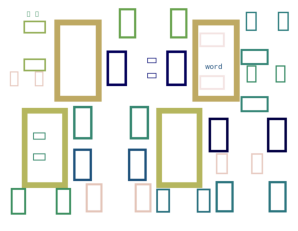

In [5]:
editDF(input_data)
createWordCloud()

In [6]:
# dftest = pd.read_csv(input_data, encoding='utf-8',index_col=['id', 'word', 'weight'])

In [7]:
# dftest

In [8]:
# k = 1000
# df = pd.read_csv(input_data, encoding='utf-8', header=None ,names=['ID', 'word', 'weight'])
# df_work = df['word']
# for i , target in enumerate(df_work):
#     text = ''
#     adj = 0
#     text = target + ' '
#     adj = math.floor(k * float(df['weight'][i]))
#     df['word'][i] = text * adj

# df_out = df['weight'].copy()
# df_out.to_csv(input_data[:-4] + '_arange.csv', encoding='utf-8-sig', index=False)

In [9]:
# df_work